# Data Aggregation/grouping and Pivot table using Pandas

### Importing libraries and packages

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("audi.csv")

#Display the Data Set

print("The first five rows of the data frame is:")
display(df.head(5))

print("The last five rows of the data frame is:")
display(df.tail(5))

The first five rows of the data frame is:


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


The last five rows of the data frame is:


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
10663,A3,2020,16999,Manual,4018,Petrol,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,47.9,1.4
10667,Q3,2016,15999,Manual,11855,Petrol,47.9,1.4


In [3]:
#dataset info

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


None

In [4]:
# statistics of the object variables
display(df.describe(include='object'))

,model,transmission,fuelType
count,10668,10668,10668
unique,26,3,3
top,A3,Manual,Diesel
freq,1929,4369,5577


### EDA based on car Model

In [5]:
#check the number of unique values in the 'model' column

print(df['model'].unique())


[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']


In [6]:
df_agg_model = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_model.head())

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015


#### Data processing before visualization

In [7]:
# sort the dataframe based on the column 'count'
df_agg_model = df_agg_model.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_model['percent_of_cars'] = (df_agg_model['count']/df_agg_model['count'].sum())*100

# convert the 'sum' column in millions
df_agg_model['sum'] = df_agg_model['sum']/1000000

# keep up to two decimal points
df_agg_model = df_agg_model.round(2)

# remove the 'count' column
df_agg_model = df_agg_model.drop('count', axis=1)

display(df_agg_model.head())

,mean,sum,percent_of_cars
model,,,
A3,17408.52,33.58,18.08
Q3,22999.26,32.59,13.28
A4,20255.45,27.97,12.95
A1,14327.75,19.30,12.63
A5,23577.11,20.80,8.27


#### Barplot: Percentage of cars, Average and Total selling price of cars by model

> We are looking for:
- > Top 5 selling car models in the dataset.
- > The average selling price of the top 5 selling car models.
- > Total sale of the top 5 selling car models.

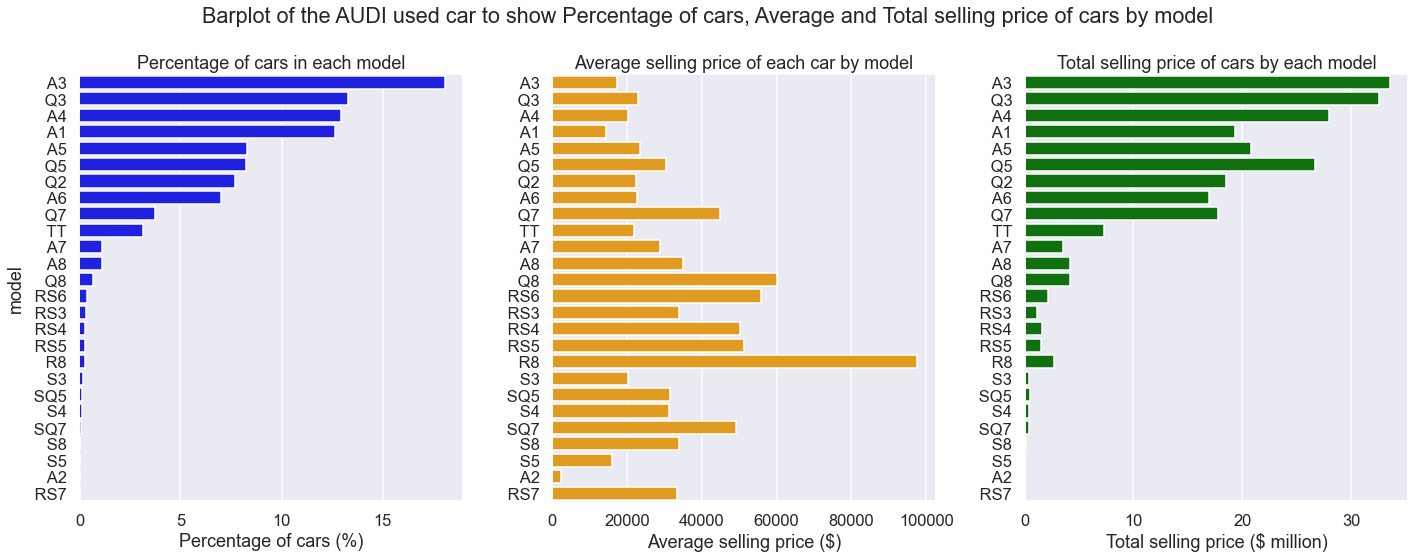

In [8]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_model.index, data=df_agg_model, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
plt.ylabel("model")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_model.index, data=df_agg_model, orient='h', color='orange')
plt.title("Average selling price of each car by model")
plt.xlabel("Average selling price ($)")
plt.ylabel("")


plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_model.index, data=df_agg_model, orient='h', color='green')
plt.title("Total selling price of cars by each model")
plt.xlabel("Total selling price ($ million)")
plt.ylabel("")


plt.suptitle("Barplot of the AUDI used car to show Percentage of cars, Average and Total selling price of cars by model")
plt.tight_layout()
plt.show()

#### Observations:
- Top 5 selling car models are A3 (18.08%), Q3 (13.28%), A4 (12.95%), A1 (12.63%) and A5 (8.27%)
- Top 5 average selling price car models are R8 (\\$97,652), Q8 (\\$60,115), RS6 (\\$55,964), RS5 (\\$51,265), and RS4 (\\$50,152)
- Top 5 total selling price car models are A3 (\\$33.58M), Q3 (\\$32.59M), A4 (\\$27.97M), Q5 (\\$26.70M) and A5 (\\$20.80M)

### EDA based on Transmission

In [9]:
#check the number of unique values in the 'transmission' column

print(df['transmission'].unique())

['Manual' 'Automatic' 'Semi-Auto']


In [10]:
df_agg_transmission = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_transmission)

,count,mean,sum
transmission,,,
Automatic,2708,28204.750000,76378463
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958


#### Data processing before visualization

In [11]:
# sort the dataframe based on the column 'count'
df_agg_transmission = df_agg_transmission.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_transmission['percent_of_cars'] = (df_agg_transmission['count']/df_agg_transmission['count'].sum())*100

# convert the 'sum' column in millions
df_agg_transmission['sum'] = df_agg_transmission['sum']/1000000

# keep up to two decimal points
df_agg_transmission = df_agg_transmission.round(2)

# remove the 'count' column
df_agg_transmission = df_agg_transmission.drop('count', axis=1)

display(df_agg_transmission)

,mean,sum,percent_of_cars
transmission,,,
Manual,16101.03,70.35,40.95
Semi-Auto,27161.78,97.54,33.66
Automatic,28204.75,76.38,25.38


#### Barplot: Percentage of cars, Average and Total selling price of cars by transmission
> We are looking for :
- > Transmission type of top 5 selling car in the dataset.
- > The average selling price of the cars based on transmission type.
- > The total selling price for each transmission type.

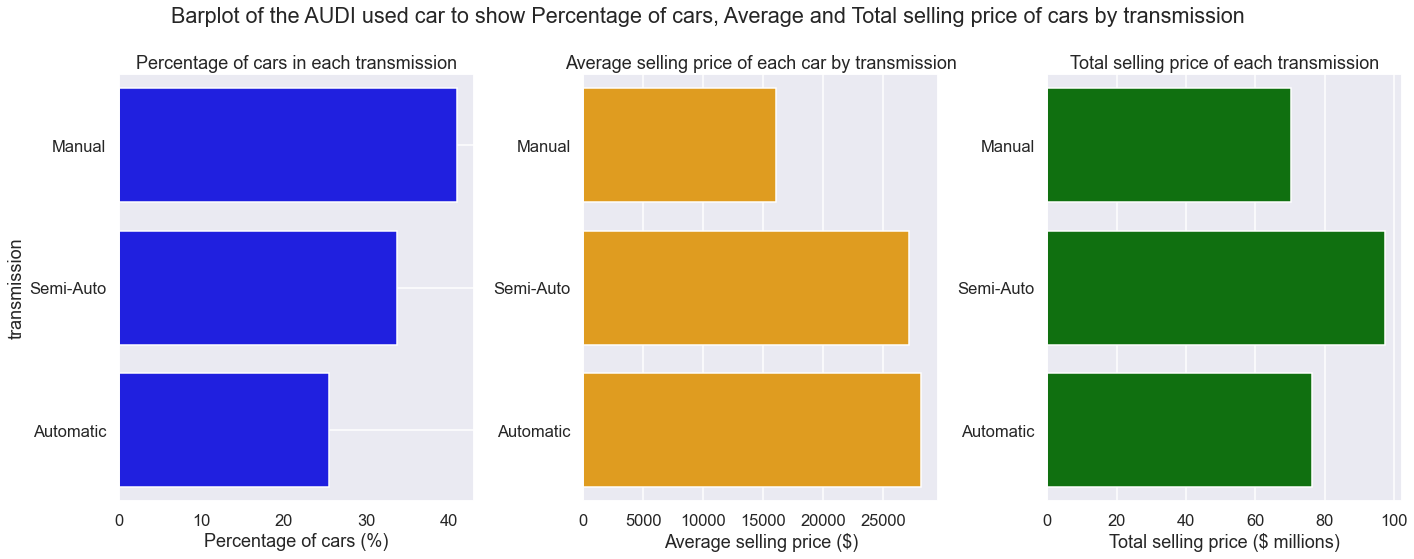

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='blue')
plt.title("Percentage of cars in each transmission")
plt.xlabel("Percentage of cars (%)")
plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='orange')
plt.title("Average selling price of each car by transmission")
plt.xlabel("Average selling price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='green')
plt.title("Total selling price of each transmission")
plt.xlabel("Total selling price ($ millions)")
plt.ylabel("")

plt.suptitle("Barplot of the AUDI used car to show Percentage of cars, Average and Total selling price of cars by transmission")
plt.tight_layout()
plt.show()

#### Observations:
- There are 3 different types of transmission type: Manual, Semi-auto, and Automatic. 
- From the above barplots, it's clear that the dataset contains most amount of data about the Manual cars (40.95%)
- If we look at the average selling price of a car by transmission type, Automatic cars have the largest selling price.
- Total selling price of Semi-auto cars \\$97.54M, Automatic \\$76.38M, and Manual \\$70.35M

### EDA based on FuelType

In [13]:
#check the number of unique values in the 'fuelType' column

print(df['fuelType'].unique())


['Petrol' 'Diesel' 'Hybrid']


In [14]:
df_agg_fuelType = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_fuelType)

,count,mean,sum
fuelType,,,
Diesel,5577,23237.516227,129595628
Hybrid,28,30191.750000,845369
Petrol,5063,22480.908355,113820839


#### Data preprocessing before visualization


In [15]:
# sort the dataframe based on the column 'count'
df_agg_fuelType = df_agg_fuelType.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_fuelType['percent_of_cars'] = (df_agg_fuelType['count']/df_agg_fuelType['count'].sum())*100

# convert the 'sum' column in millions
df_agg_fuelType['sum'] = df_agg_fuelType['sum']/1000000

# keep up to two decimal points
df_agg_fuelType = df_agg_fuelType.round(2)

# remove the 'count' column
df_agg_fuelType = df_agg_fuelType.drop('count', axis=1)

display(df_agg_fuelType)

,mean,sum,percent_of_cars
fuelType,,,
Diesel,23237.52,129.60,52.28
Petrol,22480.91,113.82,47.46
Hybrid,30191.75,0.85,0.26


#### Barplot: Percentage of cars, Average and Total selling price of cars by fuelType

- > Top 5 selling car in the dataset by fuel type.
- > The average selling price of selling car by fueltype.
- > The total selling price of selling cars by each fueltype.

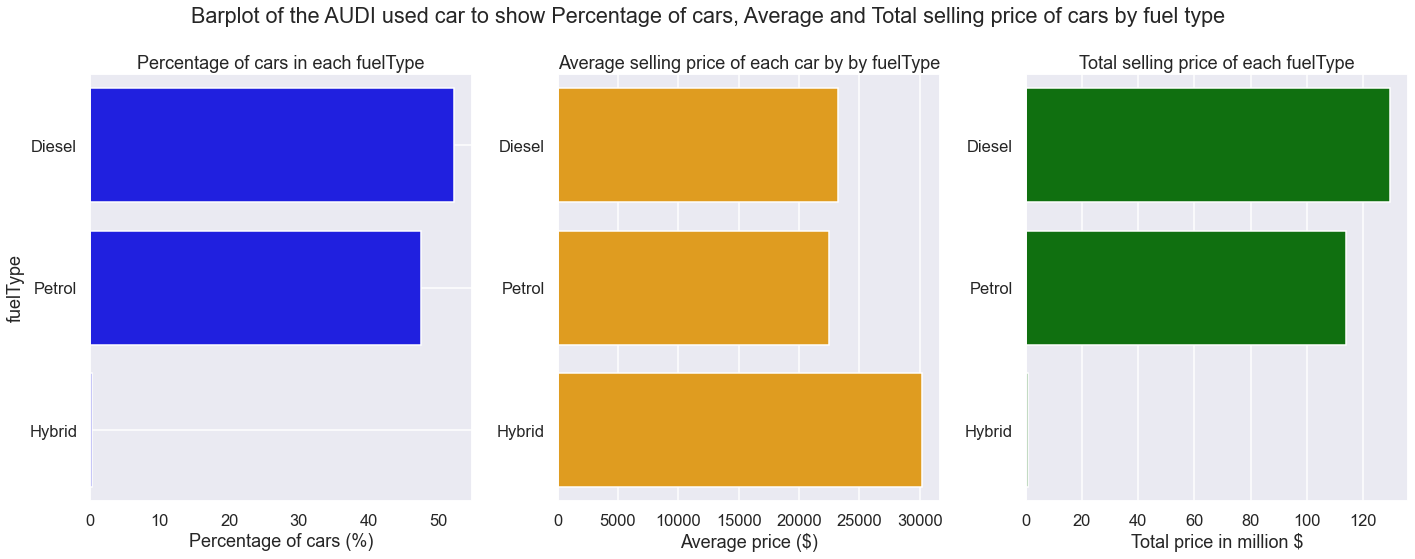

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='blue')
plt.title("Percentage of cars in each fuelType")
plt.xlabel("Percentage of cars (%)")
plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='orange')
plt.title("Average selling price of each car by by fuelType")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='green')
plt.title("Total selling price of each fuelType")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the AUDI used car to show Percentage of cars, Average and Total selling price of cars by fuel type")
plt.tight_layout()
plt.show()

#### Observations:
- In this datset, most of the AUDI cars are Diesel based (52%) and second highest is Petrol (34%)
- Average price of a Hybrid car is greater than other fuel types
- Total selling price of cars by fuelType: Diesel based cars \\$129.60M, and Petrol based cars \\$113.82M